In [429]:
conda install tensorflow

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [99]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [158]:
data = pd.read_csv('kubernetes_pod_container_kibana_train.csv', header=0)
data

,Unnamed: 0,time,pod_name,mean_cpu_usage_nanocores,mean_memory_working_set_bytes
0,45,1688142600000000000,kibana-kibana-5d996f756d-f9pwp,7.262125e+07,8.341042e+08
1,1084,1688140800000000000,kibana-kibana-5d996f756d-f9pwp,6.855917e+07,8.337992e+08
2,2138,1688139000000000000,kibana-kibana-5d996f756d-f9pwp,7.028725e+07,8.334916e+08
3,3191,1688137200000000000,kibana-kibana-5d996f756d-f9pwp,6.548785e+07,8.326758e+08
4,4243,1688135400000000000,kibana-kibana-5d996f756d-f9pwp,6.350395e+07,8.327682e+08
...,...,...,...,...,...
701,734797,1686880800000000000,kibana-kibana-5d996f756d-f9pwp,3.561873e+07,8.258808e+08
702,735825,1686879000000000000,kibana-kibana-5d996f756d-f9pwp,4.100609e+07,8.278232e+08
703,736912,1686877200000000000,kibana-kibana-5d996f756d-f9pwp,2.975671e+07,8.231906e+08
704,738000,1686875400000000000,kibana-kibana-5d996f756d-f9pwp,4.384115e+07,8.273358e+08


In [135]:
# data['time'] = pd.to_datetime(data['time'], unit='ns')
# data = data.loc[data.pod_name == 'drive-az2-prd-69cbb999bc-lpr67']
# date_time = pd.to_datetime(data['time'], format='%Y-%M-%D %H:%M:%S')

In [159]:

data = data.loc[:,['time', 'pod_name', 'mean_cpu_usage_nanocores', 'mean_memory_working_set_bytes']]
data_scaler = data.loc[:,['mean_cpu_usage_nanocores', 'mean_memory_working_set_bytes']]
# data_scaler['mean_cpu_usage_nanocores', 'mean_memory_working_set_bytes'] = data['mean_cpu_usage_nanocores', 'mean_memory_working_set_bytes']
data_scaler

,mean_cpu_usage_nanocores,mean_memory_working_set_bytes
0,7.262125e+07,8.341042e+08
1,6.855917e+07,8.337992e+08
2,7.028725e+07,8.334916e+08
3,6.548785e+07,8.326758e+08
4,6.350395e+07,8.327682e+08
...,...,...
701,3.561873e+07,8.258808e+08
702,4.100609e+07,8.278232e+08
703,2.975671e+07,8.231906e+08
704,4.384115e+07,8.273358e+08


In [160]:
# data.loc[:, ['mean_cpu_usage_nanocores', 'mean_memory_working_set_bytes']]
mms = MinMaxScaler()
data_scaler = mms.fit_transform(data_scaler)


In [161]:
data_scaler

array([[0.7194329 , 0.79717644],
       [0.66888978, 0.78818294],
       [0.69039166, 0.77910823],
       ...,
       [0.18608417, 0.47528969],
       [0.36133201, 0.59754961],
       [0.58855456, 0.67151645]])

In [162]:
data['mean_cpu_usage_nanocores'] = data_scaler[:, 0]
data['mean_memory_working_set_bytes'] = data_scaler[:, 1]
data

,time,pod_name,mean_cpu_usage_nanocores,mean_memory_working_set_bytes
0,1688142600000000000,kibana-kibana-5d996f756d-f9pwp,0.719433,0.797176
1,1688140800000000000,kibana-kibana-5d996f756d-f9pwp,0.668890,0.788183
2,1688139000000000000,kibana-kibana-5d996f756d-f9pwp,0.690392,0.779108
3,1688137200000000000,kibana-kibana-5d996f756d-f9pwp,0.630674,0.755047
4,1688135400000000000,kibana-kibana-5d996f756d-f9pwp,0.605989,0.757774
...,...,...,...,...
701,1686880800000000000,kibana-kibana-5d996f756d-f9pwp,0.259023,0.554637
702,1686879000000000000,kibana-kibana-5d996f756d-f9pwp,0.326056,0.611924
703,1686877200000000000,kibana-kibana-5d996f756d-f9pwp,0.186084,0.475290
704,1686875400000000000,kibana-kibana-5d996f756d-f9pwp,0.361332,0.597550


In [163]:
data = pd.DataFrame(data)
data['mean_cpu_usage_nanocores'] = data['mean_cpu_usage_nanocores'] * 1000000000
data

,time,pod_name,mean_cpu_usage_nanocores,mean_memory_working_set_bytes
0,1688142600000000000,kibana-kibana-5d996f756d-f9pwp,7.194329e+08,0.797176
1,1688140800000000000,kibana-kibana-5d996f756d-f9pwp,6.688898e+08,0.788183
2,1688139000000000000,kibana-kibana-5d996f756d-f9pwp,6.903917e+08,0.779108
3,1688137200000000000,kibana-kibana-5d996f756d-f9pwp,6.306745e+08,0.755047
4,1688135400000000000,kibana-kibana-5d996f756d-f9pwp,6.059894e+08,0.757774
...,...,...,...,...
701,1686880800000000000,kibana-kibana-5d996f756d-f9pwp,2.590233e+08,0.554637
702,1686879000000000000,kibana-kibana-5d996f756d-f9pwp,3.260564e+08,0.611924
703,1686877200000000000,kibana-kibana-5d996f756d-f9pwp,1.860842e+08,0.475290
704,1686875400000000000,kibana-kibana-5d996f756d-f9pwp,3.613320e+08,0.597550


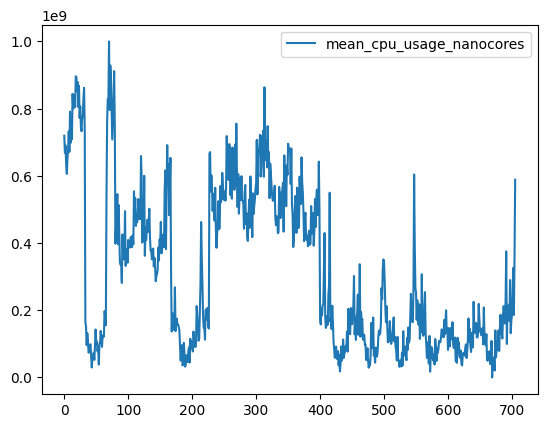

In [164]:
plot_cols = ['mean_cpu_usage_nanocores']
plot_features = data[plot_cols] 
# plot_features.index = date_time
_ = plot_features.plot(subplots=True)

# plot_features = data[plot_cols][:1440]
# plot_features.index = date_time[:1440]
# _ = plot_features.plot(subplots=True)

In [165]:
data.to_csv('kubernetes_pod_container_kibana_train_scaled.csv')